# Credit Card Lab for Unsupervised Machine Learning

Notebook Author: Tan Song Xin Alastair

Dataset Source: Kaggle

Dataset Source URL: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Accessed Date: 14 February 2025

In [1]:
import pandas as pd
import numpy as np
import sklearn, statistics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.stats import kstest
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

#Get rid of warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
# Check if there are null/na values to deal with
filename = "CC GENERAL.csv"

pd_dataset = pd.read_csv(filename)
print("General Data Check:")
print(pd_dataset.head())
print("Number of Rows:", len(pd_dataset))

print("NA/NULL count:")
print(pd_dataset.isna().sum())

General Data Check:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1               

TODO explanation on data cleaning.

In [26]:
print("Number of NaNs inside Credit Limit:", len(pd_dataset.loc[pd_dataset["CREDIT_LIMIT"].isna()])) # Row 5203
print("Number of NaNs inside Minimum Payments:", len(pd_dataset.loc[pd_dataset["MINIMUM_PAYMENTS"].isna()]))

pd_dataset.loc[pd_dataset["MINIMUM_PAYMENTS"].isna(), "MINIMUM_PAYMENTS"] = 0.00
print("Number of NaNs inside Minimum Payments after setting to 0:", len(pd_dataset.loc[pd_dataset["MINIMUM_PAYMENTS"].isna()]))

# Minimum payments will be imputed as 0.
# Do data imputation. Since Credit Limit is generally similar values, will use KNN Imputer

pd_dataset_clean = pd_dataset[["BALANCE", "BALANCE_FREQUENCY", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", \
                               "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX", "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT", "TENURE"]]

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights="uniform")
pd_dataset_clean = pd.DataFrame(imputer.fit_transform(pd_dataset_clean), columns=pd_dataset_clean.columns)

print("Number of NaNs inside Credit Limit:", len(pd_dataset_clean.loc[pd_dataset_clean["CREDIT_LIMIT"].isna()])) # Row 5203
print(pd_dataset_clean.iloc[5202])

Number of NaNs inside Credit Limit: 1
Number of NaNs inside Minimum Payments: 0
Number of NaNs inside Minimum Payments after setting to 0: 0
Number of NaNs inside Credit Limit: 0
BALANCE                        216.705656
BALANCE_FREQUENCY                1.000000
PURCHASES                     1442.900000
ONEOFF_PURCHASES               424.600000
INSTALLMENTS_PURCHASES        1018.300000
CASH_ADVANCE                     0.000000
PURCHASES_FREQUENCY              1.000000
ONEOFF_PURCHASES_FREQUENCY       0.666667
CASH_ADVANCE_FREQUENCY           0.000000
CASH_ADVANCE_TRX                 0.000000
PURCHASES_TRX                   29.000000
CREDIT_LIMIT                  4000.000000
PAYMENTS                      1111.898226
MINIMUM_PAYMENTS                87.775306
PRC_FULL_PAYMENT                 1.000000
TENURE                           6.000000
Name: 5202, dtype: float64


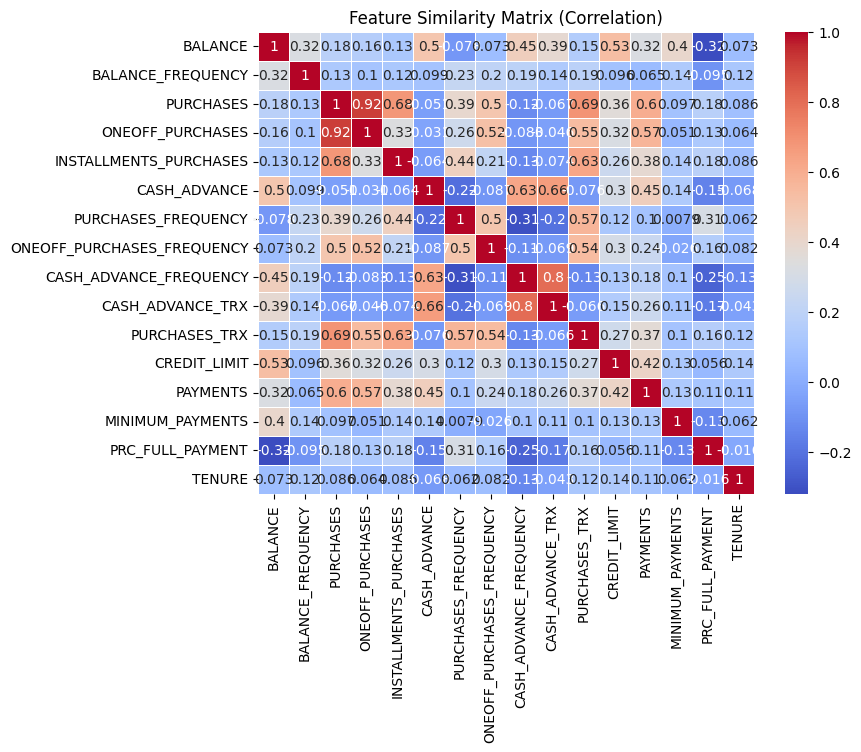

In [17]:
# Compute similarity matrix (correlation in this case)
similarity_matrix = pd_dataset[["BALANCE", "BALANCE_FREQUENCY", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", \
                               "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX", "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT", "TENURE"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Similarity Matrix (Correlation)")
plt.show()

In [25]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
pca_2.fit(pd_dataset_clean)

print(pca_2.explained_variance_ratio_.sum())
print(pca_2.singular_values_)

pca_3 = PCA(n_components=3)
pca_3.fit(pd_dataset_clean)

print(pca_3.explained_variance_ratio_.sum())
print(pca_3.singular_values_)

pca_4 = PCA(n_components=4)
pca_4.fit(pd_dataset_clean)

print(pca_4.explained_variance_ratio_.sum())
print(pca_4.singular_values_)

pca_5 = PCA(n_components=5)
pca_5.fit(pd_dataset_clean)

print(pca_5.explained_variance_ratio_.sum())
print(pca_5.singular_values_)

pca_6 = PCA(n_components=6)
pca_6.fit(pd_dataset_clean)

print(pca_6.explained_variance_ratio_.sum())
print(pca_6.singular_values_)

pca_7 = PCA(n_components=7)
pca_7.fit(pd_dataset_clean)

print(pca_7.explained_variance_ratio_.sum())
print(pca_7.singular_values_)

0.652989613343895
[432398.09255082 264287.322721  ]
0.7932449844893724
[432398.09255082 264287.322721   234864.60283673]
0.9067220746999298
[432398.09255082 264287.322721   234864.60283673 211257.3912408 ]
0.9547776952438204
[432398.09255082 264287.322721   234864.60283673 211257.3912408
 137476.95737734]
0.9819424356608483
[432398.09255082 264287.322721   234864.60283673 211257.3912408
 137476.95737734 103361.9268248 ]
0.9999920109168728
[432398.09255082 264287.322721   234864.60283673 211257.3912408
 137476.95737734 103361.9268248   84254.15168227]
